CS4001/4042 Assignment 1
---
Part B, Q1 (15 marks)
---

Real world datasets often have a mix of numeric and categorical features – this dataset is one example. To build models on such data, categorical features have to be encoded or embedded.

PyTorch Tabular is a library that makes it very convenient to build neural networks for tabular data. It is built on top of PyTorch Lightning, which abstracts away boilerplate model training code and makes it easy to integrate other tools, e.g. TensorBoard for experiment tracking.

For questions B1 and B2, the following features should be used:   
- **Numeric / Continuous** features: dist_to_nearest_stn, dist_to_dhoby, degree_centrality, eigenvector_centrality, remaining_lease_years, floor_area_sqm
- **Categorical** features: month, town, flat_model_type, storey_range



---



In [1]:
SEED = 42

import os

import random
random.seed(SEED)

import numpy as np
np.random.seed(SEED)

import pandas as pd

import torch
import torch.nn as nn

from pytorch_tabular import TabularModel
from pytorch_tabular.models import CategoryEmbeddingModelConfig
from pytorch_tabular.config import (
    DataConfig,
    OptimizerConfig,
    TrainerConfig,
)

from sklearn.metrics import root_mean_squared_error, r2_score

> Divide the dataset (‘hdb_price_prediction.csv’) into train and test sets by using entries from year 2020 and before as training data, and year 2021 as test data (validation set is not required).
**Do not** use data from year 2022 and year 2023.



In [2]:
df = pd.read_csv('hdb_price_prediction.csv')

# TODO: Enter your code here
train_df = df[df["year"] <= 2020]
test_df = df[df["year"] == 2021]

print(train_df.head(), end="\n\n")

print(test_df.head())

   month  year        town              full_address   nearest_stn  \
0      1  2017  ANG MO KIO  406 ANG MO KIO AVENUE 10    Ang Mo Kio   
1      1  2017  ANG MO KIO   108 ANG MO KIO AVENUE 4    Ang Mo Kio   
2      1  2017  ANG MO KIO   602 ANG MO KIO AVENUE 5  Yio Chu Kang   
3      1  2017  ANG MO KIO  465 ANG MO KIO AVENUE 10    Ang Mo Kio   
4      1  2017  ANG MO KIO   601 ANG MO KIO AVENUE 5  Yio Chu Kang   

   dist_to_nearest_stn  dist_to_dhoby  degree_centrality  \
0             1.007264       7.006044           0.016807   
1             1.271389       7.983837           0.016807   
2             1.069743       9.090700           0.016807   
3             0.946890       7.519889           0.016807   
4             1.092551       9.130489           0.016807   

   eigenvector_centrality         flat_model_type  remaining_lease_years  \
0                0.006243        2 ROOM, Improved              61.333333   
1                0.006243  3 ROOM, New Generation              60.

> Refer to the documentation of **PyTorch Tabular** and perform the following tasks: https://pytorch-tabular.readthedocs.io/en/latest/#usage
- Use **[DataConfig](https://pytorch-tabular.readthedocs.io/en/latest/data/)** to define the target variable, as well as the names of the continuous and categorical variables.
- Use **[TrainerConfig](https://pytorch-tabular.readthedocs.io/en/latest/training/)** to automatically tune the learning rate. Set batch_size to be 1024 and set max_epoch as 50.
- Use **[CategoryEmbeddingModelConfig](https://pytorch-tabular.readthedocs.io/en/latest/models/#category-embedding-model)** to create a feedforward neural network with 1 hidden layer containing 50 neurons.
- Use **[OptimizerConfig](https://pytorch-tabular.readthedocs.io/en/latest/optimizer/)** to choose Adam optimiser. There is no need to set the learning rate (since it will be tuned automatically) nor scheduler.
- Use **[TabularModel](https://pytorch-tabular.readthedocs.io/en/latest/tabular_model/)** to initialise the model and put all the configs together.

In [3]:
data_config = DataConfig(
    target=["resale_price"],
    continuous_cols=[
        "dist_to_nearest_stn",
        "dist_to_dhoby",
        "degree_centrality",
        "eigenvector_centrality",
        "remaining_lease_years",
        "floor_area_sqm",
    ],
    categorical_cols=["month", "town", "flat_model_type", "storey_range"],
)

trainer_config = TrainerConfig(
    batch_size=1024,
    max_epochs=50,
    auto_lr_find=True,
)

model_config = CategoryEmbeddingModelConfig(
    task="regression",
    layers="50",
)

optimizer_config = OptimizerConfig(
    optimizer="Adam",
)

model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
)

2025-03-14 23:56:24,255 - {pytorch_tabular.tabular_model:146} - INFO - Experiment Tracking is turned off

> Report the test RMSE error and the test R2 value that you obtained.


In [4]:
# TODO: Enter your code here

model.fit(train_df, test_df)
preds = model.predict(test_df)

test_rmse = root_mean_squared_error(test_df["resale_price"], preds)
test_r2 = r2_score(test_df["resale_price"], preds)

print(f"Test RMSE error: {test_rmse:.2f}")
print(f"Test R2 value: {test_r2:.2f}")

model_choose = model

Seed set to 42


2025-03-14 23:56:24,274 - {pytorch_tabular.tabular_model:548} - INFO - Preparing the DataLoaders

2025-03-14 23:56:24,303 - {pytorch_tabular.tabular_datamodule:522} - INFO - Setting up the datamodule for          
regression task

/Users/huruilizhen/Desktop/SC4001-Assignment-1/.venv/lib/python3.10/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
/Users/huruilizhen/Desktop/SC4001-Assignment-1/.venv/lib/python3.10/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace 

2025-03-14 23:56:24,378 - {pytorch_tabular.tabular_model:599} - INFO - Preparing the Model: CategoryEmbeddingModel

2025-03-14 23:56:24,410 - {pytorch_tabular.tabular_model:342} - INFO - Preparing the Trainer

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


2025-03-14 23:56:24,456 - {pytorch_tabular.tabular_model:656} - INFO - Auto LR Find Started

/Users/huruilizhen/Desktop/SC4001-Assignment-1/.venv/lib/python3.10/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /Users/huruilizhen/Desktop/SC4001-Assignment-1/saved_models exists and is not empty.
/Users/huruilizhen/Desktop/SC4001-Assignment-1/.venv/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/Users/huruilizhen/Desktop/SC4001-Assignment-1/.venv/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.5754399373371567
Restoring states from the checkpoint path at /Users/huruilizhen/Desktop/SC4001-Assignment-1/.lr_find_9b9366a4-20f2-41af-95d3-c31b10ede07d.ckpt
Restored all states from the checkpoint at /Users/huruilizhen/Desktop/SC4001-Assignment-1/.lr_find_9b9366a4-20f2-41af-95d3-c31b10ede07d.ckpt


2025-03-14 23:56:27,090 - {pytorch_tabular.tabular_model:669} - INFO - Suggested LR: 0.5754399373371567. For plot  
and detailed analysis, use `find_learning_rate` method.

2025-03-14 23:56:27,092 - {pytorch_tabular.tabular_model:678} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                      ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ CategoryEmbeddingBackbone │  3.0 K │ train │
│ 1 │ _embedding_layer │ Embedding1dLayer          │  1.6 K │ train │
│ 2 │ head             │ LinearHead                │     51 │ train │
│ 3 │ loss             │ MSELoss                   │      0 │ train │
└───┴──────────────────┴───────────────────────────┴────────┴───────┘

Trainable params: 4.6 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 4.6 K                                                                                                
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 16                                                                                          
Modules in eval mode: 0

Output()

2025-03-14 23:56:45,472 - {pytorch_tabular.tabular_model:689} - INFO - Training the model completed

2025-03-14 23:56:45,473 - {pytorch_tabular.tabular_model:1529} - INFO - Loading the best model

/Users/huruilizhen/Desktop/SC4001-Assignment-1/.venv/lib/python3.10/site-packages/pytorch_tabular/utils/python_utils.py:85: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ret

Test RMSE error: 65112.11
Test R2 value: 0.84


> Print out the corresponding rows in the dataframe for the top 25 test samples with the largest errors. 



In [5]:
# TODO: Enter your code here
test_errors = (preds["resale_price_prediction"] - test_df["resale_price"]).abs()
top_25_test_errors = test_errors.nlargest(25)
print(test_df.loc[top_25_test_errors.index])

        month  year             town                full_address  \
90957       6  2021      BUKIT BATOK  288A BUKIT BATOK STREET 25   
92405      11  2021      BUKIT MERAH            46 SENG POH ROAD   
90608      12  2021           BISHAN       273B BISHAN STREET 24   
93825       8  2021     CENTRAL AREA       4 TANJONG PAGAR PLAZA   
93895      11  2021     CENTRAL AREA       3 TANJONG PAGAR PLAZA   
92533      12  2021      BUKIT MERAH          2C BOON TIONG ROAD   
112128     12  2021         TAMPINES      156 TAMPINES STREET 12   
88081       8  2021       ANG MO KIO    310A ANG MO KIO AVENUE 1   
92442      11  2021      BUKIT MERAH          127D KIM TIAN ROAD   
90432       8  2021           BISHAN       275A BISHAN STREET 24   
92340      10  2021      BUKIT MERAH            56 HAVELOCK ROAD   
89770      10  2021            BEDOK           103 LENGKONG TIGA   
98379      12  2021          HOUGANG        615 HOUGANG AVENUE 8   
101237     11  2021  KALLANG/WHAMPOA            

Part B, Q2 (10 marks)
---
In Question B1, we used the Category Embedding model. This creates a feedforward neural network in which the categorical features get learnable embeddings. In this question, we will make use of a library called Pytorch-WideDeep. This library makes it easy to work with multimodal deep-learning problems combining images, text, and tables. We will just be utilizing the deeptabular component of this library through the TabMlp network.

In [6]:
from pytorch_widedeep.preprocessing import TabPreprocessor
from pytorch_widedeep.models import TabMlp, WideDeep
from pytorch_widedeep import Trainer
from pytorch_widedeep.metrics import R2Score

>Divide the dataset (‘hdb_price_prediction.csv’) into train and test sets by using entries from the year 2020 and before as training data, and entries from 2021 and after as the test data（validation set is not required here).

In [7]:
# TODO: Enter your code here
df = pd.read_csv("hdb_price_prediction.csv")

train_df = df[df["year"] <= 2020]
test_df = df[df["year"] == 2021]

print(train_df.head(), end="\n\n")

print(test_df.head())

   month  year        town              full_address   nearest_stn  \
0      1  2017  ANG MO KIO  406 ANG MO KIO AVENUE 10    Ang Mo Kio   
1      1  2017  ANG MO KIO   108 ANG MO KIO AVENUE 4    Ang Mo Kio   
2      1  2017  ANG MO KIO   602 ANG MO KIO AVENUE 5  Yio Chu Kang   
3      1  2017  ANG MO KIO  465 ANG MO KIO AVENUE 10    Ang Mo Kio   
4      1  2017  ANG MO KIO   601 ANG MO KIO AVENUE 5  Yio Chu Kang   

   dist_to_nearest_stn  dist_to_dhoby  degree_centrality  \
0             1.007264       7.006044           0.016807   
1             1.271389       7.983837           0.016807   
2             1.069743       9.090700           0.016807   
3             0.946890       7.519889           0.016807   
4             1.092551       9.130489           0.016807   

   eigenvector_centrality         flat_model_type  remaining_lease_years  \
0                0.006243        2 ROOM, Improved              61.333333   
1                0.006243  3 ROOM, New Generation              60.

>Refer to the documentation of Pytorch-WideDeep and perform the following tasks:
https://pytorch-widedeep.readthedocs.io/en/latest/index.html
* Use [**TabPreprocessor**](https://pytorch-widedeep.readthedocs.io/en/latest/examples/01_preprocessors_and_utils.html#2-tabpreprocessor) to create the deeptabular component using the continuous
features and the categorical features. Use this component to transform the training dataset.
* Create the [**TabMlp**](https://pytorch-widedeep.readthedocs.io/en/latest/pytorch-widedeep/model_components.html#pytorch_widedeep.models.tabular.mlp.tab_mlp.TabMlp) model with 2 hidden layers in the MLP, with 200 and 100 neurons respectively.
* Create a [**Trainer**](https://pytorch-widedeep.readthedocs.io/en/latest/pytorch-widedeep/trainer.html#pytorch_widedeep.training.Trainer) for the training of the created TabMlp model with the root mean squared error (RMSE) cost function. Train the model for 60 epochs using this trainer, keeping a batch size of 64. (Note: set the *num_workers* parameter to 0.)

In [8]:
# TODO: Enter your code here

preprocessor = TabPreprocessor(
    continuous_cols=["dist_to_nearest_stn", "dist_to_dhoby", "degree_centrality", "eigenvector_centrality", "remaining_lease_years", "floor_area_sqm"],
    categorical_cols=["month", "town", "flat_model_type", "storey_range"],
    scale=True,
)

X_tab_train = preprocessor.fit_transform(train_df)
X_tab_test = preprocessor.transform(test_df)

tab_mlp = TabMlp(
    column_idx=preprocessor.column_idx,
    continuous_cols=preprocessor.continuous_cols,
    mlp_hidden_dims=[200, 100],
)

model = WideDeep(deeptabular=tab_mlp)

trainer = Trainer(
    model=model,
    objective="rmse",
    num_workers=0,
)

trainer.fit(X_tab=X_tab_train, target=train_df["resale_price"].values, batch_size=64, n_epochs=60)

/Users/huruilizhen/Desktop/SC4001-Assignment-1/.venv/lib/python3.10/site-packages/pytorch_widedeep/preprocessing/tab_preprocessor.py:299: DeprecationWarning: 'scale' and 'already_standard' will be deprecated in the next release. Please use 'cols_to_scale' instead
  self._check_inputs(cat_embed_cols)
epoch 60: 100%|██████████| 1366/1366 [00:06<00:00, 195.56it/s, loss=5.8e+4] 


>Report the test RMSE and the test R2 value that you obtained.

In [9]:
# TODO: Enter your code here
preds = trainer.predict(X_tab=X_tab_test)

test_rmse = root_mean_squared_error(test_df["resale_price"], preds)
test_r2 = r2_score(test_df["resale_price"], preds)

print(f"Test RMSE error: {test_rmse:.2f}")
print(f"Test R2 value: {test_r2:.2f}")

predict: 100%|██████████| 455/455 [00:00<00:00, 524.58it/s]


Test RMSE error: 71137.93
Test R2 value: 0.81


Part B, Q3 (10 marks)
---
Besides ensuring that your neural network performs well, it is important to be able to explain the model’s decision. **Captum** is a very handy library that helps you to do so for PyTorch models.

Many model explainability algorithms for deep learning models are available in Captum. These algorithms are often used to generate an attribution score for each feature. Features with larger scores are more ‘important’ and some algorithms also provide information about directionality (i.e. a feature with very negative attribution scores means the larger the value of that feature, the lower the value of the output).

In general, these algorithms can be grouped into two paradigms:
- **perturbation based approaches** (e.g. Feature Ablation)
- **gradient / backpropagation based approaches** (e.g. Saliency)

The former adopts a brute-force approach of removing / permuting features one by one and does not scale up well. The latter depends on gradients and they can be computed relatively quickly. But unlike how backpropagation computes gradients with respect to weights, gradients here are computed **with respect to the input**. This gives us a sense of how much a change in the input affects the model’s outputs.




---



In [10]:
from captum.attr import InputXGradient, DeepLift, NoiseTunnel, IntegratedGradients, GradientShap, FeatureAblation

> First, use the train set (year 2020 and before) and test set (year 2021) following the splits in Question B1 (validation set is not required here). To keep things simple, we will **limit our analysis to numeric / continuous features only**. Drop all categorical features from the dataframes. Standardise the features via **StandardScaler** (fit to training set, then transform all).

In [11]:
# TODO: Enter your code here
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('hdb_price_prediction.csv')
train_df = df[df["year"] <= 2020]
test_df = df[df["year"] == 2021]

numeric_cols = [
    "dist_to_nearest_stn",
    "dist_to_dhoby",
    "degree_centrality",
    "eigenvector_centrality",
    "remaining_lease_years",
    "floor_area_sqm",
    "resale_price"
]
train_df = train_df[numeric_cols]
test_df = test_df[numeric_cols]

preprocess_cols = [
    "dist_to_nearest_stn",
    "dist_to_dhoby",
    "degree_centrality",
    "eigenvector_centrality",
    "remaining_lease_years",
    "floor_area_sqm",
]
scaler = StandardScaler()
train_df[preprocess_cols] = scaler.fit_transform(train_df[preprocess_cols])
test_df[preprocess_cols] = scaler.transform(test_df[preprocess_cols])

train_df.head()

,dist_to_nearest_stn,dist_to_dhoby,degree_centrality,eigenvector_centrality,remaining_lease_years,floor_area_sqm,resale_price
0,0.417407,-1.010151,-0.136981,-0.014527,-1.035566,-2.212177,232000.0
1,0.984169,-0.775978,-0.136981,-0.014527,-1.093501,-1.265110,250000.0
2,0.551474,-0.510894,-0.136981,-0.196828,-0.951882,-1.265110,262000.0
3,0.287854,-0.887089,-0.136981,-0.014527,-0.977631,-1.223934,265000.0
4,0.600418,-0.501364,-0.136981,-0.196828,-0.951882,-1.265110,265000.0


> Follow this tutorial to generate the plot from various model explainability algorithms (https://captum.ai/tutorials/House_Prices_Regression_Interpret).
Specifically, make the following changes:
- Use a feedforward neural network with 3 hidden layers, each having 5 neurons. Train using Adam optimiser with learning rate of 0.001.
- Use Input x Gradients, Integrated Gradients, DeepLift, GradientSHAP, Feature Ablation. To avoid long running time, you can limit the analysis to the first 1000 samples in test set.

Epoch 1/100, Test RMSE: 536380.27, Test R2: -9.88
Epoch 2/100, Test RMSE: 525719.84, Test R2: -9.45
Epoch 3/100, Test RMSE: 459546.24, Test R2: -6.98
Epoch 4/100, Test RMSE: 304963.54, Test R2: -2.52
Epoch 5/100, Test RMSE: 192367.53, Test R2: -0.40
Epoch 6/100, Test RMSE: 160034.15, Test R2: 0.03
Epoch 7/100, Test RMSE: 143668.84, Test R2: 0.22
Epoch 8/100, Test RMSE: 130684.60, Test R2: 0.35
Epoch 9/100, Test RMSE: 120523.01, Test R2: 0.45
Epoch 10/100, Test RMSE: 112310.42, Test R2: 0.52
Epoch 11/100, Test RMSE: 106300.23, Test R2: 0.57
Epoch 12/100, Test RMSE: 102539.79, Test R2: 0.60
Epoch 13/100, Test RMSE: 99513.50, Test R2: 0.63
Epoch 14/100, Test RMSE: 97767.00, Test R2: 0.64
Epoch 15/100, Test RMSE: 96981.07, Test R2: 0.64
Epoch 16/100, Test RMSE: 96025.41, Test R2: 0.65
Epoch 17/100, Test RMSE: 95270.93, Test R2: 0.66
Epoch 18/100, Test RMSE: 94223.52, Test R2: 0.66
Epoch 19/100, Test RMSE: 94193.03, Test R2: 0.66
Epoch 20/100, Test RMSE: 93352.20, Test R2: 0.67
Epoch 21/100

/Users/huruilizhen/Desktop/SC4001-Assignment-1/.venv/lib/python3.10/site-packages/captum/_utils/gradient.py:57: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  warnings.warn(
/Users/huruilizhen/Desktop/SC4001-Assignment-1/.venv/lib/python3.10/site-packages/captum/attr/_core/deep_lift.py:304: UserWarning: Setting forward, backward hooks and attributes on non-linear
               activations. The hooks and attributes will be removed
            after the attribution is finished
  warnings.warn(


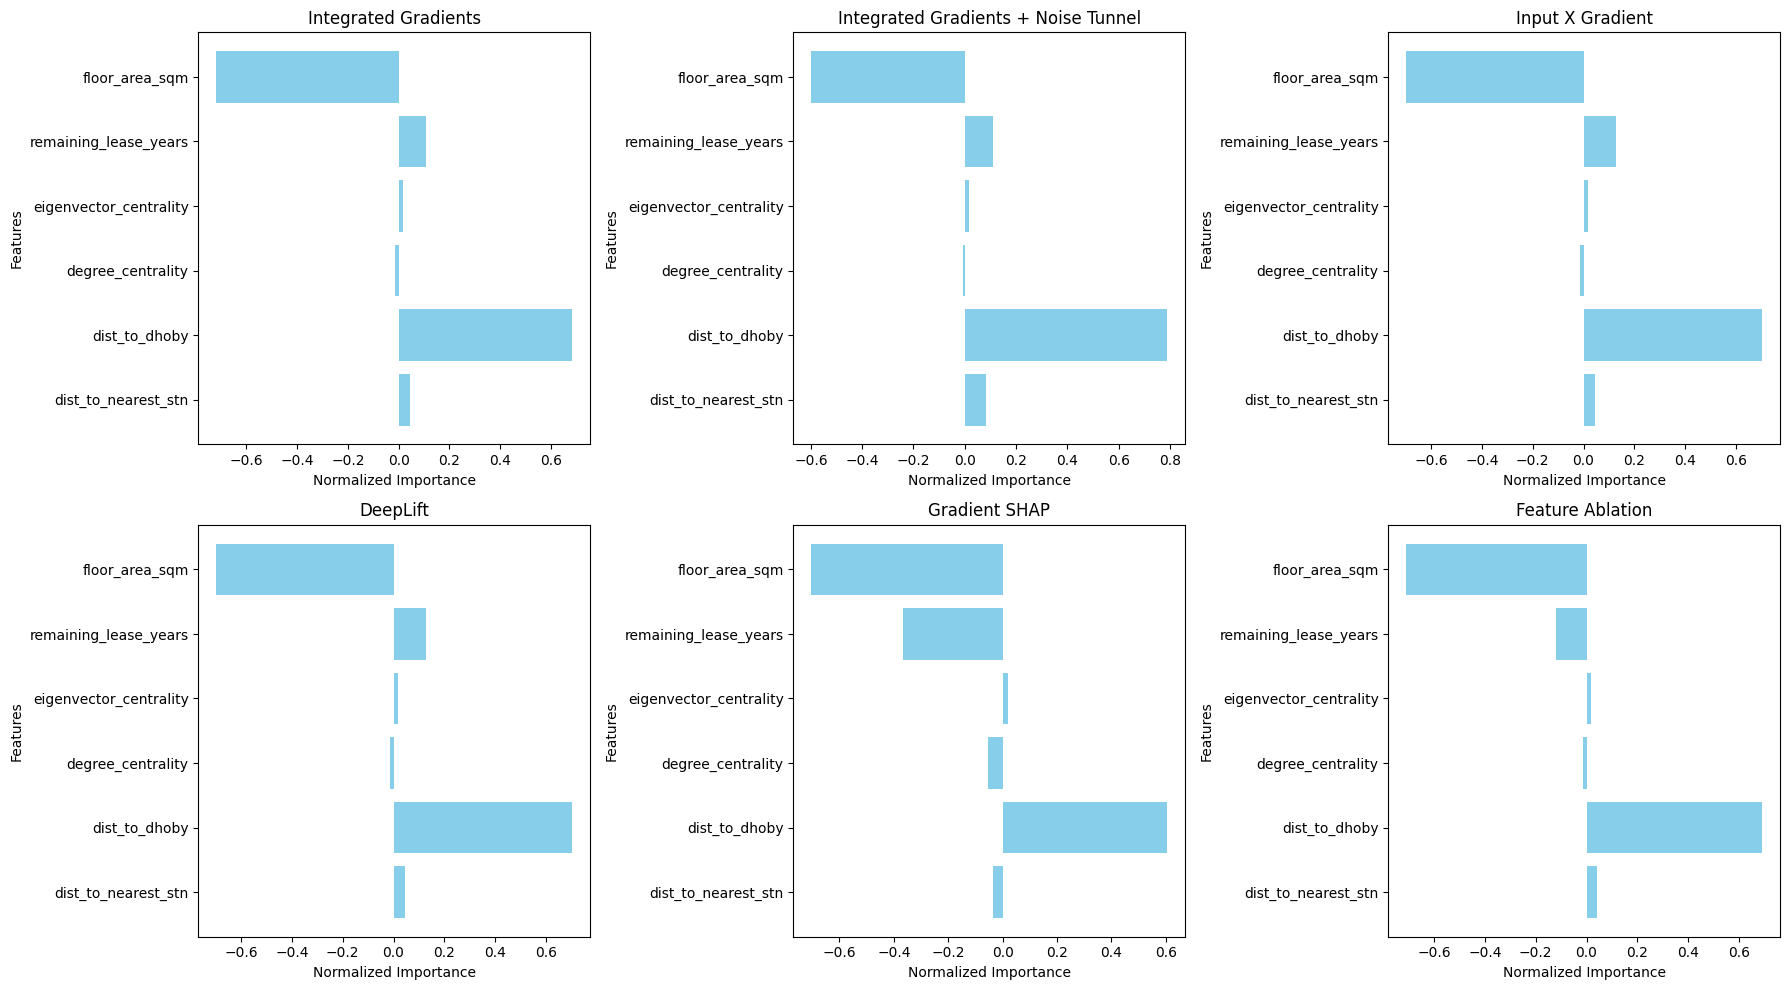

In [12]:
# TODO: Enter your code here

feature_names = train_df.drop("resale_price", axis=1).columns

X_train = train_df.drop("resale_price", axis=1).to_numpy()
y_train = train_df["resale_price"].to_numpy()

X_test = test_df.drop("resale_price", axis=1).to_numpy()
y_test = test_df["resale_price"].to_numpy()

class HouseDataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32).reshape(-1, 6)
        self.y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

class HouseDataLoader(torch.utils.data.DataLoader):
    def __init__(self, dataset, batch_size, shuffle=True):
        super(HouseDataLoader, self).__init__(dataset, batch_size, shuffle=shuffle)
        self.shuffle = shuffle

class MLP(nn.Module):
    def __init__(self, input_size=6, hidden_size=5, output_size=1):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

model = MLP()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

train_dataset = HouseDataset(X_train, y_train)
train_dataloader = HouseDataLoader(train_dataset, batch_size=1024, shuffle=True)

test_dataset = HouseDataset(X_test, y_test)
test_dataloader = HouseDataLoader(test_dataset, batch_size=1024, shuffle=False)

for epoch in range(100):
    model.train()
    for X, y in train_dataloader:
        optimizer.zero_grad()
        y_pred = model(X)
        loss = criterion(y_pred, y)
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        y_pred_list = []
        for X, y in test_dataloader:
            y_pred = model(X)
            y_pred_list.append(y_pred)
        y_pred_list = torch.cat(y_pred_list)
        test_rmse = root_mean_squared_error(y_test, y_pred_list)
        test_r2 = r2_score(y_test, y_pred_list)
        print(f"Epoch {epoch+1}/{100}, Test RMSE: {test_rmse:.2f}, Test R2: {test_r2:.2f}")


ig = IntegratedGradients(model)
ig_nt = NoiseTunnel(ig)
ixg = InputXGradient(model)
dl = DeepLift(model)
gs = GradientShap(model)
fa = FeatureAblation(model)

X_test_sample = torch.tensor(X_test[:1000], dtype=torch.float32)
X_train_sample = torch.tensor(X_train[:1000], dtype=torch.float32)

ig_attr_test = ig.attribute(X_test_sample)
ig_nt_attr_test = ig_nt.attribute(X_test_sample)
ixg_attr_test = ixg.attribute(X_test_sample)
dl_attr_test = dl.attribute(X_test_sample)
gs_attr_test = gs.attribute(X_test_sample, X_train_sample)
fa_attr_test = fa.attribute(X_test_sample)

ig_attr_test_sum = ig_attr_test.detach().numpy().sum(axis=0)
ig_nt_attr_test_sum = ig_nt_attr_test.detach().numpy().sum(axis=0)
ixg_attr_test_sum = ixg_attr_test.detach().numpy().sum(axis=0)
dl_attr_test_sum = dl_attr_test.detach().numpy().sum(axis=0)
gs_attr_test_sum = gs_attr_test.detach().numpy().sum(axis=0)
fa_attr_test_sum = fa_attr_test.detach().numpy().sum(axis=0)

ig_attr_test_norm_sum = ig_attr_test_sum / np.linalg.norm(ig_attr_test_sum)
ig_nt_attr_test_norm_sum = ig_nt_attr_test_sum / np.linalg.norm(ig_nt_attr_test_sum)
ixg_attr_test_norm_sum = ixg_attr_test_sum / np.linalg.norm(ixg_attr_test_sum)
dl_attr_test_norm_sum = dl_attr_test_sum / np.linalg.norm(dl_attr_test_sum)
gs_attr_test_norm_sum = gs_attr_test_sum / np.linalg.norm(gs_attr_test_sum)
fa_attr_test_norm_sum = fa_attr_test_sum / np.linalg.norm(fa_attr_test_sum)

import matplotlib.pyplot as plt

attr_methods = {
    "Integrated Gradients": ig_attr_test_norm_sum,
    "Integrated Gradients + Noise Tunnel": ig_nt_attr_test_norm_sum,
    "Input X Gradient": ixg_attr_test_norm_sum,
    "DeepLift": dl_attr_test_norm_sum,
    "Gradient SHAP": gs_attr_test_norm_sum,
    "Feature Ablation": fa_attr_test_norm_sum,
}

fig, ax = plt.subplots(2, 3, figsize=(18, 10))
ax = ax.flatten()

for i, (method, attr) in enumerate(attr_methods.items()):
    ax[i].barh(feature_names, attr, color="skyblue")
    ax[i].set_title(method)
    ax[i].set_xlabel("Normalized Importance")
    ax[i].set_ylabel("Features")

plt.tight_layout()
plt.show()

> Read the following [descriptions](https://captum.ai/docs/attribution_algorithms) and [comparisons](https://captum.ai/docs/algorithms_comparison_matrix) in Captum to build up your understanding of the difference of various explainability algorithms. Based on your plot, identify the three most important features for regression. Explain how each of these features influences the regression outcome.

\# TODO: \<Enter your answer here\>


This graph illustrates the six feature attribution methods evaluated for feature importance in house price prediction models. The results show that distance to Dhoby Ghaut, the size of the house and the remaining lease life are the three key factors influencing house prices. The results of different attribution methods are generally consistent, indicating that the model relies on these characteristics for predictions stably. Among them, the area of the house and the lease period are positively correlated with the house price, while the impact of distance may be affected by the data bias. Through the comparison of multiple interpretation methods, the decision-making logic of the model can be understood more comprehensively, and the transparency and credibility of the model can be improved.

Part B, Q4 (10 marks)
---

Model degradation is a common issue faced when deploying machine learning models (including neural networks) in the real world. New data points could exhibit a different pattern from older data points due to factors such as changes in government policy or market sentiments. For instance, housing prices in Singapore have been increasing and the Singapore government has introduced 3 rounds of cooling measures over the past years (16 December 2021, 30 September 2022, 27 April 2023).

In such situations, the distribution of the new data points could differ from the original data distribution which the models were trained on. Recall that machine learning models often work with the assumption that the test distribution should be similar to train distribution. When this assumption is violated, model performance will be adversely impacted.  In the last part of this assignment, we will investigate to what extent model degradation has occurred.




---



In [6]:
from alibi_detect.cd import TabularDrift

> Evaluate your model from B1 on data from year 2022 and report the test R2.

In [7]:
# TODO: Enter your code here

test_df_2022 = pd.read_csv("hdb_price_prediction.csv")
test_df_2022 = test_df_2022[test_df_2022["year"] == 2022]

preds_2022 = model_choose.predict(test_df_2022)

test_rmse_2022 = root_mean_squared_error(test_df_2022["resale_price"], preds_2022)
test_r2_2022 = r2_score(test_df_2022["resale_price"], preds_2022)

print(f"Test RMSE error: {test_rmse_2022:.2f}")
print(f"Test R2 value: {test_r2_2022:.2f}")

/Users/huruilizhen/Desktop/SC4001-Assignment-1/.venv/lib/python3.10/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
/Users/huruilizhen/Desktop/SC4001-Assignment-1/.venv/lib/python3.10/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace 

Test RMSE error: 116321.54
Test R2 value: 0.53


> Evaluate your model from B1 on data from year 2023 and report the test R2.

In [8]:
# TODO: Enter your code here

test_df_2023 = pd.read_csv("hdb_price_prediction.csv")
test_df_2023 = test_df_2023[test_df_2023["year"] == 2023]

preds_2023 = model_choose.predict(test_df_2023)

test_rmse_2023 = root_mean_squared_error(test_df_2023["resale_price"], preds_2023)
test_r2_2023 = r2_score(test_df_2023["resale_price"], preds_2023)

print(f"Test RMSE error: {test_rmse_2023:.2f}")
print(f"Test R2 value: {test_r2_2023:.2f}")

/Users/huruilizhen/Desktop/SC4001-Assignment-1/.venv/lib/python3.10/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
/Users/huruilizhen/Desktop/SC4001-Assignment-1/.venv/lib/python3.10/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace 

Test RMSE error: 147204.61
Test R2 value: 0.26


> Did model degradation occur for the deep learning model?

\# TODO: \<Enter your answer here\>

Yes, we can see the $R^2$ score keeps decreasing from 2022 to 2023, from 0.84 (2021) to 0.54 (2022) to 0.26 (2023).

Model degradation could be caused by [various data distribution shifts](https://huyenchip.com/2022/02/07/data-distribution-shifts-and-monitoring.html#data-shift-types): covariate shift (features), label shift and/or concept drift (altered relationship between features and labels).
There are various conflicting terminologies in the [literature](https://www.sciencedirect.com/science/article/pii/S0950705122002854#tbl1). Let’s stick to this reference for this assignment.

> Using the **Alibi Detect** library, apply the **TabularDrift** function with the training data (year 2020 and before) used as the reference and **detect which features have drifted** in the 2023 test dataset. Before running the statistical tests, ensure you **sample 1000 data points** each from the train and test data. Do not use the whole train/test data. (Hint: use this example as a guide https://docs.seldon.io/projects/alibi-detect/en/stable/examples/cd_chi2ks_adult.html)


In [9]:
# TODO: Enter your code

feature_names = ["dist_to_nearest_stn", "dist_to_dhoby", "degree_centrality", "eigenvector_centrality", "remaining_lease_years", "floor_area_sqm"]
train_ndarray_sample = train_df.sample(n=1000, random_state=42)[feature_names].to_numpy()
test_ndarray_2023_sample = test_df_2023.sample(n=1000, random_state=42)[feature_names].to_numpy()

cd = TabularDrift(x_ref=train_ndarray_sample, p_val=0.05)

labels = {0: "No", 1: "Yes"}

feature_drift_pred = cd.predict(test_ndarray_2023_sample, drift_type="feature")

for f in range(cd.n_features):
    stat = "K-S"
    fname = feature_names[f]
    is_drift = feature_drift_pred["data"]["is_drift"][f]
    stat_val, p_val = (
        feature_drift_pred["data"]["distance"][f],
        feature_drift_pred["data"]["p_val"][f],
    )
    print(
        f"{fname} -- Drift? {labels[is_drift]} -- {stat} {stat_val:.3f} -- p-value {p_val:.3f}"
    )

dist_to_nearest_stn -- Drift? Yes -- K-S 0.072 -- p-value 0.011
dist_to_dhoby -- Drift? No -- K-S 0.030 -- p-value 0.747
degree_centrality -- Drift? No -- K-S 0.027 -- p-value 0.849
eigenvector_centrality -- Drift? No -- K-S 0.033 -- p-value 0.635
remaining_lease_years -- Drift? Yes -- K-S 0.117 -- p-value 0.000
floor_area_sqm -- Drift? No -- K-S 0.054 -- p-value 0.104


/Users/huruilizhen/Desktop/SC4001-Assignment-1/.venv/lib/python3.10/site-packages/alibi_detect/cd/tabular.py:113: UserWarning: No `categories_per_feature` dict provided so all features are assumed to be numerical. `KSDrift` will be applied to all features.
  warnings.warn('No `categories_per_feature` dict provided so all features are assumed to be numerical. '


> Assuming that the flurry of housing measures have made an impact on the relationship between all the features and resale_price (i.e. P(Y|X) changes), which type of data distribution shift possibly led to model degradation?

\# TODO: \<Enter your answer here\>

It is assumed that the government's property regulation policy affects the relationship between characteristics and housing prices. This suggests that the main reason for model degradation is concept drift, i.e., the same features affect house prices differently in 2023

> From your analysis via TabularDrift, which features contribute to this shift?

\# TODO: \<Enter your answer here\>

From the analysis above, we can see that the features that contribute to this shift are: dist_to_nearest_stn, remaining_lease_years

> Suggest 1 way to address model degradation and implement it, showing improved test R2 for year 2023.

\# TODO: \<Enter your answer here\>

We can retrain the model on the data from year 2022, and then use the retrained model to predict the data from year 2023.

In [10]:
# TODO: Enter your code here

model_choose.fit(test_df_2022, test_df_2023)

preds_2023 = model_choose.predict(test_df_2023)

test_rmse_2023 = root_mean_squared_error(test_df_2023["resale_price"], preds_2023)
test_r2_2023 = r2_score(test_df_2023["resale_price"], preds_2023)

print(f"Test RMSE error: {test_rmse_2023:.2f}")
print(f"Test R2 value: {test_r2_2023:.2f}")

Seed set to 42


2025-03-14 23:56:51,311 - {pytorch_tabular.tabular_model:548} - INFO - Preparing the DataLoaders

2025-03-14 23:56:51,327 - {pytorch_tabular.tabular_datamodule:522} - INFO - Setting up the datamodule for          
regression task

/Users/huruilizhen/Desktop/SC4001-Assignment-1/.venv/lib/python3.10/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
/Users/huruilizhen/Desktop/SC4001-Assignment-1/.venv/lib/python3.10/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace 

2025-03-14 23:56:51,363 - {pytorch_tabular.tabular_model:599} - INFO - Preparing the Model: CategoryEmbeddingModel

2025-03-14 23:56:51,384 - {pytorch_tabular.tabular_model:342} - INFO - Preparing the Trainer

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


2025-03-14 23:56:51,461 - {pytorch_tabular.tabular_model:656} - INFO - Auto LR Find Started

/Users/huruilizhen/Desktop/SC4001-Assignment-1/.venv/lib/python3.10/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /Users/huruilizhen/Desktop/SC4001-Assignment-1/saved_models exists and is not empty.
/Users/huruilizhen/Desktop/SC4001-Assignment-1/.venv/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/Users/huruilizhen/Desktop/SC4001-Assignment-1/.venv/lib/python3.10/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (27) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
/Users/huruilizhen/Desktop/SC4001-Assignment-1/.venv/lib/python3.10/site-packages/pytorch_lightning/t

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.8317637711026709
Restoring states from the checkpoint path at /Users/huruilizhen/Desktop/SC4001-Assignment-1/.lr_find_59e7f623-0595-43be-bec5-17a3bfb0b5fc.ckpt
Restored all states from the checkpoint at /Users/huruilizhen/Desktop/SC4001-Assignment-1/.lr_find_59e7f623-0595-43be-bec5-17a3bfb0b5fc.ckpt


2025-03-14 23:56:53,495 - {pytorch_tabular.tabular_model:669} - INFO - Suggested LR: 0.8317637711026709. For plot  
and detailed analysis, use `find_learning_rate` method.

2025-03-14 23:56:53,497 - {pytorch_tabular.tabular_model:678} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                      ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ CategoryEmbeddingBackbone │  3.0 K │ train │
│ 1 │ _embedding_layer │ Embedding1dLayer          │  1.6 K │ train │
│ 2 │ head             │ LinearHead                │     51 │ train │
│ 3 │ loss             │ MSELoss                   │      0 │ train │
└───┴──────────────────┴───────────────────────────┴────────┴───────┘

Trainable params: 4.6 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 4.6 K                                                                                                
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 16                                                                                          
Modules in eval mode: 0

Output()

2025-03-14 23:57:06,824 - {pytorch_tabular.tabular_model:689} - INFO - Training the model completed

2025-03-14 23:57:06,825 - {pytorch_tabular.tabular_model:1529} - INFO - Loading the best model

Test RMSE error: 41847.40
Test R2 value: 0.94


/Users/huruilizhen/Desktop/SC4001-Assignment-1/.venv/lib/python3.10/site-packages/pytorch_tabular/utils/python_utils.py:85: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ret